In [48]:
import json
import os

import numpy as np
import matplotlib.pyplot as plt


os.makedirs("../figs/", exist_ok=True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams['mathtext.fontset'] = 'stix'  # The setting of math font

In [49]:
results = json.load(open("../validation-results/order-match-results.json"))

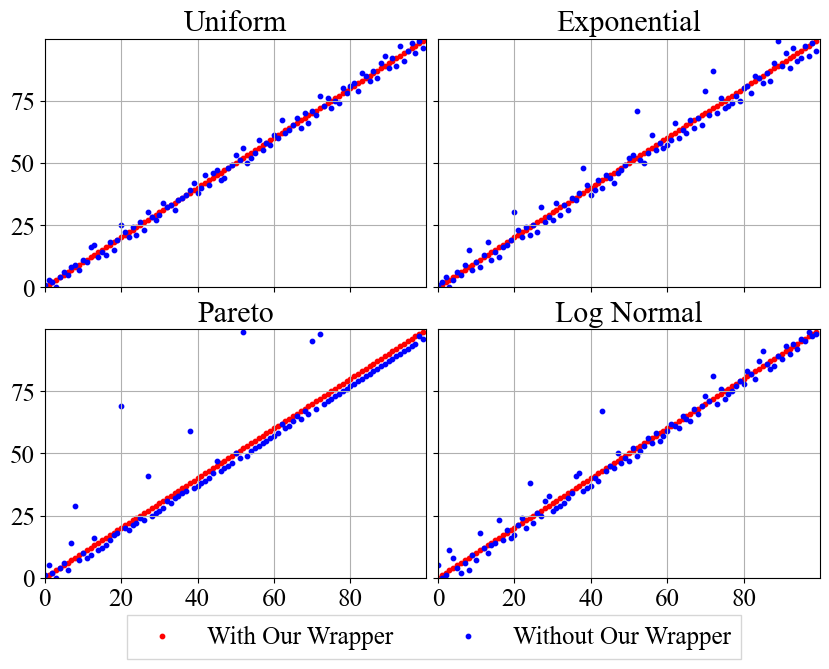

In [51]:
fig, axes = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(10, 7),
    sharex=True,
    sharey=True,
    gridspec_kw=dict(hspace=0.17, wspace=0.03)
)
dist_dict = {
    "random": "Uniform",
    "exponential": "Exponential",
    "pareto": "Pareto",
    "lognormal": "Log Normal",
}

for i, (dist, result) in enumerate(results.items()):
    r, c = i // 2, i % 2
    ax = axes[r][c]
    ax.set_xlim(0, 99.9)
    ax.set_ylim(0, 99.9)
    lines = [
        ax.scatter(result["answer"], result["simulated"], color="red", s=10),
        ax.scatter(result["answer"], result["random"], color="blue", s=10),
    ]
    ax.set_title(dist_dict[dist])
    ax.grid()

axes[-1][0].legend(
    handles=lines,
    loc='upper center',
    labels=["With Our Wrapper", "Without Our Wrapper"],
    fontsize=18,
    bbox_to_anchor=(1.02, -0.10),  # ここは調整が必要です
    fancybox=False,
    ncol=len(lines)
)

plt.savefig("../figs/order-match.pdf", bbox_inches="tight")